<a href="https://colab.research.google.com/github/hakkanazrul06/PRAKTIKUMSTRUKTURDATA/blob/main/LATIHAN_STRUKDAT_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install networkx matplotlib

In [2]:
import heapq
import networkx as nx

import matplotlib.pyplot as plt

def dijkstra_with_paths(graph, start):
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    previous = {node: None for node in graph}
    queue = [(0, start)]

    while queue:
        current_distance, current_node = heapq.heappop(queue)

        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous[neighbor] = current_node
                heapq.heappush(queue, (distance, neighbor))

    return distances, previous

In [3]:
def get_path(previous, target):
    path = []
    while target is not None:
        path.insert(0, target)
        target = previous[target]
    return path

In [4]:
def visualize_graph(graph, path=None):
    G = nx.DiGraph()

    for node in graph:
        for neighbor, weight in graph[node].items():
            G.add_edge(node, neighbor, weight=weight)

    pos = nx.spring_layout(G)
    edge_labels = nx.get_edge_attributes(G, 'weight')

    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000,
            font_weight='bold', arrows=True)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    # Garis tebal untuk jalur terpendek
    if path and len(path) > 1:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red',
                               width=3)

    plt.title("Visualisasi Graf dan Jalur Terpendek")
    plt.axis('off')
    plt.show()

Jarak dari A ke Z: 14
Jalur: A -> B -> D -> E -> Z


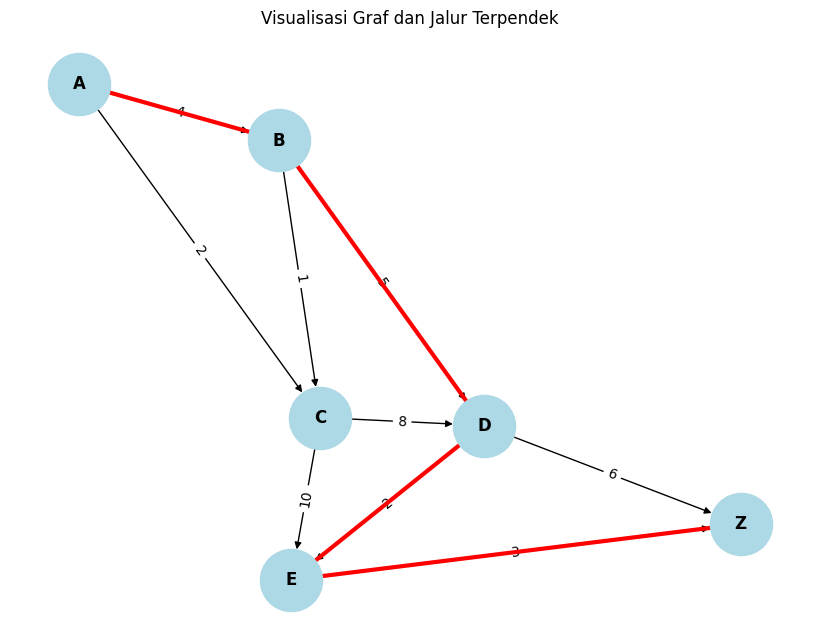

In [6]:
# Definisi graf
graph = {
    'A': {'B': 4, 'C': 2},
    'B': {'C': 1, 'D': 5},
    'C': {'D': 8, 'E': 10},
    'D': {'E': 2, 'Z': 6},
    'E': {'Z': 3},
    'Z': {}
}

# Jalankan Dijkstra
start_node = 'A'
end_node = 'Z'
distances, previous = dijkstra_with_paths(graph, start_node)

# Rekonstruksi jalur
shortest_path = get_path(previous, end_node)
print(f"Jarak dari {start_node} ke {end_node}: {distances[end_node]}")
print(f"Jalur: {' -> '.join(shortest_path)}")

# Visualisasi
visualize_graph(graph, path=shortest_path)

Jarak dari A ke Z: 14
Jalur terpendek: A -> B -> D -> E -> Z

Visualisasi dengan Circular Layout:


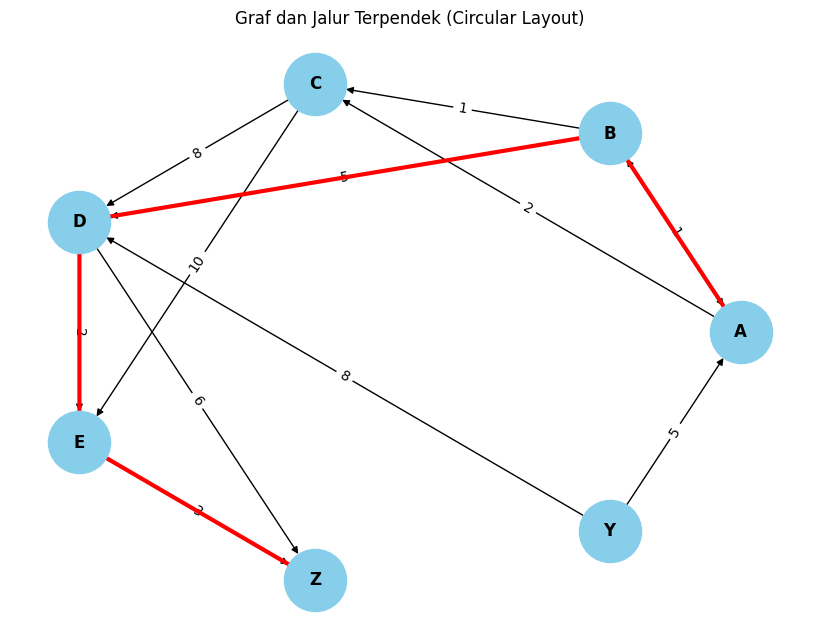


Visualisasi dengan Kamada Kawai Layout:


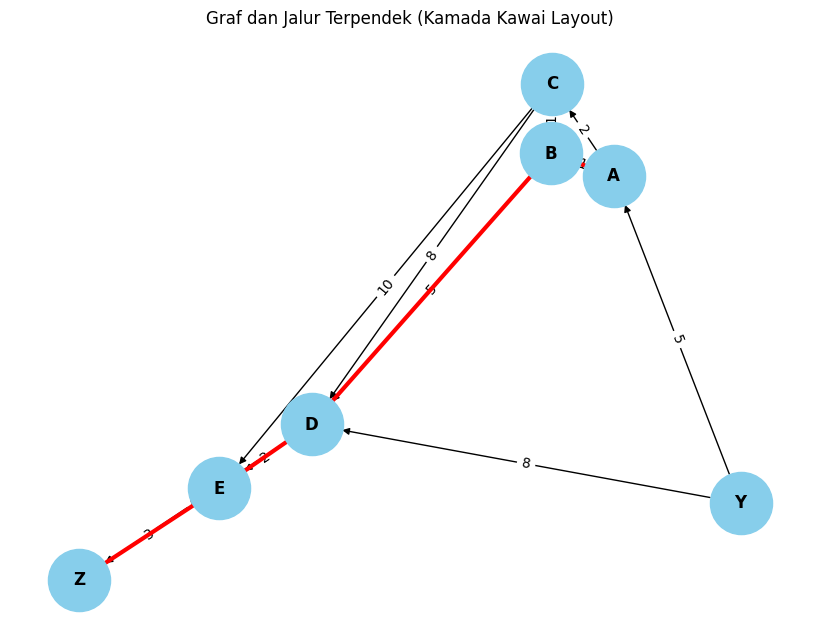


Visualisasi dengan Spring Layout:


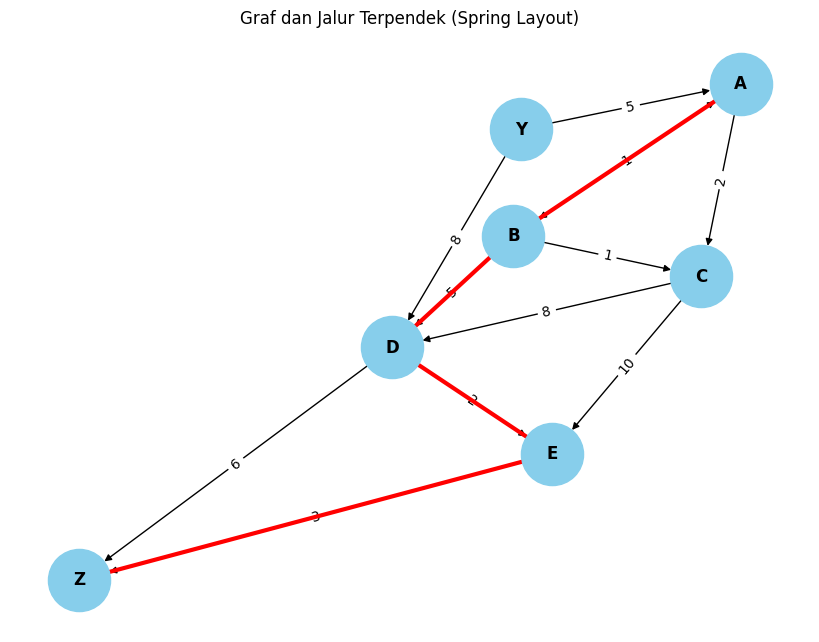

In [5]:
# Tugas
import matplotlib.pyplot as plt
import networkx as nx
import heapq

graph = {
    'A': {'B': 4, 'C': 2},
    'B': {'C': 1, 'D': 5, 'A': 1},
    'C': {'D': 8, 'E': 10},
    'D': {'E': 2, 'Z': 6},
    'E': {'Z': 3},
    'Y': {'A': 5, 'D': 8},
    'Z': {}
}

def dijkstra_with_paths(graph, start):
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    previous = {node: None for node in graph}
    queue = [(0, start)]

    while queue:
        current_dist, current_node = heapq.heappop(queue)
        if current_dist > distances[current_node]:
            continue
        for neighbor, weight in graph[current_node].items():
            dist = current_dist + weight
            if dist < distances[neighbor]:
                distances[neighbor] = dist
                previous[neighbor] = current_node
                heapq.heappush(queue, (dist, neighbor))
    return distances, previous

def get_path(previous, target):
    path = []
    while target:
        path.insert(0, target)
        target = previous[target]
    return path

def visualize_graph(graph, path=None, layout='spring'):
    G = nx.DiGraph()
    for u, edges in graph.items():
        for v, w in edges.items():
            G.add_edge(u, v, weight=w)

    if layout == 'circular':
        pos = nx.circular_layout(G)
    elif layout == 'kamada_kawai':
        pos = nx.kamada_kawai_layout(G)
    else:
        pos = nx.spring_layout(G)

    edge_labels = nx.get_edge_attributes(G, 'weight')
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_weight='bold', arrows=True)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    if path and len(path) > 1:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=3)

    plt.title(f"Graf dan Jalur Terpendek ({layout.replace('_', ' ').title()} Layout)")
    plt.axis('off')
    plt.show()

start, end = 'A', 'Z'
distances, previous = dijkstra_with_paths(graph, start)
shortest_path = get_path(previous, end)

print(f"Jarak dari {start} ke {end}: {distances[end]}")
print(f"Jalur terpendek: {' -> '.join(shortest_path)}")

for layout_name in ['circular', 'kamada_kawai', 'spring']:
    print(f"\nVisualisasi dengan {layout_name.replace('_', ' ').title()} Layout:")
    visualize_graph(graph, path=shortest_path, layout=layout_name)
